Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [ ]:
NAME = "TASNIM RAHMAN MOUMITA"
ID = "22301689"
SECTION = "08"

---

Part 1: Polynomial Root Finding Using Bisection Method
---

### `pandas` Dataframe:
Before we start we will know a little about `pandas` dataframe. `pandas` is a python library. Dataframes are classes that are used to store complex data. You can initialize one as a python dictionary. Let's take a look.

In [ ]:
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [1.0, 5.2, 3.9, 8.4, 14.6, 12.3, 8.9, 10.2]

dictionary = {
    "x": x,
    "y": y,
}
df = pd.DataFrame(dictionary)
df.head(8)

,x,y
0,0,1.0
1,1,5.2
2,2,3.9
3,3,8.4
4,4,14.6
5,5,12.3
6,6,8.9
7,7,10.2


We can use it to print data in a tabular format. We can even use more numpy arrays with it.

In [ ]:
import numpy as np

x = np.linspace(0, np.pi/2, 15)
y = np.sin(x)

dictionary = {
    "x": x,
    "sin(x)": y,
}
df = pd.DataFrame(dictionary)
df.head(5)

,x,sin(x)
0,0.000000,0.000000
1,0.112200,0.111964
2,0.224399,0.222521
3,0.336599,0.330279
4,0.448799,0.433884


### Root Finding:
Let $f(x)$ be a function of $x$. if for some $x=\alpha, f(x) = f(\alpha) = 0$, we say $\alpha$ is a root of function $x$.

Let,
$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + 0.5x + 2\tag{6.1}$$

The graph of $f(x)$ looks like this.

[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


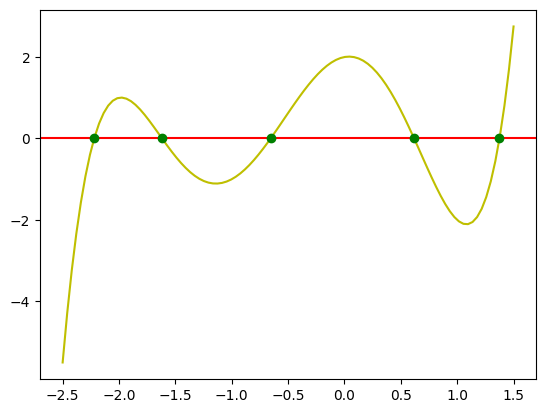

In [ ]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
x = np.linspace(-2.5, 1.5, 100)
y = f(x)

plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(f.roots(), [0.0]*5, 'go')
print(f.roots())

Roots are the points where the graph intersects with the $X$-axis.

### Bisection

One way to find out root's are to use bisection method. Here is the strategy, if $\alpha$ is a root between and interval $[a, b]$ then graph will cross the $X$-axis at $\alpha$. So, $sign( f(\alpha-h) ) = - sign( f(\alpha+h) )$, for small value of $h$.

So, we can work our way up towards the root by taking average of $a$ and $b$, as long as the signs are different.

we will start with $a_0$ and $b_0$, such that, $f(a_0) f(b_0) < 0$.
Then we iterate as this,
\begin{align}
m_k &= \frac{a_k + b_k}{2} \\
\text{if, } f(a_k) f(m_k) < 0, \text{ then, } a_{k+1} &= a_k \text{ and } b_{k+1} = m_k\\
\text{else, } a_{k+1} &= m_k \text{ and, } b_{k+1} = b_k
\end{align}

We keep iterating until we find the root with sufficient precision. We usually use a formula like this,
$$
\frac{|m_{k+1} - m_k|}{|m_{k+1}|} \leq \epsilon \\  
$$
Where, $\epsilon$ is a very small value, like $\epsilon < 10^{-6}$

## Task 1 - 2 Marks
Complete the code below to iterate and solve for a root of the following equation, between the interval, $[-0.5, 1.3]$:
\begin{aligned}
    f(x) = 2 + 0.5x - 6x^2 - 2x^3 + 2.5x^4 + x^5.
\end{aligned}

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# The polynomial and the range is defined for you
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
a = -0.5
b = 1.3
m = (a + b) / 2
e = 1e-6

root = m    # You need to update this value

# Populate the following lists in each iteration
list_a = [a]
list_b = [b]
list_m = [m]
list_f = [f(m)]

# YOUR CODE HERE
x = 0
y = 0
val = 2e1
while(val >= e):
    if(f(list_a[x]) * f(list_m[x]) < 0):
        list_a.append(list_a[x])
        list_b.append(list_m[x])
    elif(f(list_b[x]) * f(list_m[x]) < 0):
        list_a.append(list_m[x])
        list_b.append(list_b[x])
    m = (list_a[x + 1] + list_b[x + 1]) / 2
    root = m
    list_f.append(f(m))
    list_m.append(m)

    if x > 1:
        val = (abs(list_m[y + 1] - list_m[y]) / abs(list_m[y]))
    print(val)
    x = x + 1
    y = y + 1
#raise NotImplementedError()

20.0
20.0
0.18000000000000008
0.10975609756097567
0.049450549450549566
0.023560209424083732
0.011508951406649507
0.00568900126422254
0.0028284098051540984
0.0014182161991805507
0.0007101151964650968
0.00035530990919861467
0.00017771809960122936
8.887484446898626e-05
4.444137195442376e-05
2.2219698503236163e-05
1.111009611460409e-05
5.555109775105573e-06
2.7775394579263736e-06
1.388765871521362e-06
6.943839000973432e-07


In [ ]:
xs = np.linspace(-2.5, 1.5, 100)
ys = f(xs)

           a         b         m          f(m)
0  -0.500000  1.300000  0.400000  1.186240e+00
1   0.400000  1.300000  0.850000 -1.389529e+00
2   0.400000  0.850000  0.625000 -4.269409e-02
3   0.400000  0.625000  0.512500  6.189171e-01
4   0.512500  0.625000  0.568750  2.966661e-01
5   0.568750  0.625000  0.596875  1.286523e-01
6   0.596875  0.625000  0.610938  4.333223e-02
7   0.610938  0.625000  0.617969  3.991260e-04
8   0.617969  0.625000  0.621484 -2.112851e-02
9   0.617969  0.621484  0.619727 -1.035982e-02
10  0.617969  0.619727  0.618848 -4.979112e-03
11  0.617969  0.618848  0.618408 -2.289682e-03
12  0.617969  0.618408  0.618188 -9.452003e-04
13  0.617969  0.618188  0.618079 -2.730176e-04
14  0.617969  0.618079  0.618024  6.305907e-05
15  0.618024  0.618079  0.618051 -1.049781e-04
16  0.618024  0.618051  0.618037 -2.095919e-05
17  0.618024  0.618037  0.618031  2.105002e-05
18  0.618031  0.618037  0.618034  4.543651e-08
19  0.618034  0.618037  0.618036 -1.045687e-05
20  0.618034 

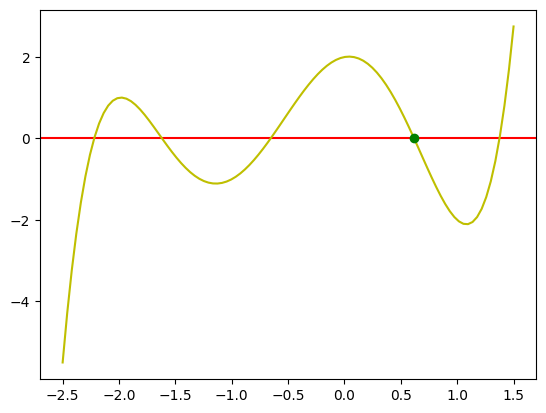

In [ ]:
plt.axhline(y=0, color='r')
plt.plot(xs, ys,'y')
plt.plot(root, f(root), 'go')

print(pd.DataFrame({'a':list_a, 'b':list_b, 'm':list_m, 'f(m)':list_f}))

assert "{:.3f}".format(root) == "0.618"

# Part 2: Fixed Point Iteration

### Fixed point:
A number $\xi$ is called a **fixed point** to function $g(x)$ if $g(\xi) = \xi$. Using fixed points are a nice strategy to find roots of an equation. In this method if we are trying to find a root of $f(x) = 0$, we try to write the function in the form, $x = g(x)$. That is,
$$
f(x) = x - g(x) = 0
$$

So, if $\xi$ is a fixed point of $g(x)$ it would also be a root of $f(x)=0$, because,
$$
f(\xi) = \xi - g(\xi) = \xi - \xi = 0
$$

We can find a suitable $g(x)$ in any number of ways. Not all of them would converge; whereas, some would converge very fast. For example, consider $Eq. 6.1$.

\begin{align}
&         &    f(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &x - g(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &    g(x) &=-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2 \tag{6.2}\\
\end{align}

again,
$$
f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 = 0\\
$$
\begin{align}
&\implies &6x^2 &= x^5 + 2.5x^4 - 2x^3 + x + 2 \\
&\implies &x^2  &= \frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)\\
&\implies &x    &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\\
&\implies &g(x) &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\tag{6.3}\\
\end{align}

Similarly,
\begin{align}
&         &2.5x^4 &= -x^5 + 2x^3 + 6x^2 - x - 2 \\
&\implies &x^4  &= \frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)\\
&\implies &x    &= \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\\
&\implies &g(x) &= \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\tag{6.4}\\
\end{align}

## Task 2 -  2 Marks
For this example we will use a couple of $g(x)$ function to find out which one converges faster.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
g1 = Polynomial([-2.0, 0.0, 6.0, 2.0, -2.5, -1.0])

def g2(x):
    p = Polynomial([2.0, 1.0, 0.0, -2.0, 2.5, 1.0])
    return np.sqrt(p(x)/6)

def g3(x):
    p = Polynomial([-2.0, -1.0, 6.0, 2.0, 0.0, -1.0])
    return np.power(p(x)/2.5, 1.0/4.0)

a1 = 0.80
g1_a = [a1]

a2 = 0.80
g2_a = [a2]

a3 = 0.80
g3_a = [a3]

# YOUR CODE HERE

for i in range(21):
  p = g1(a1)
  g1_a.append(p)
  a1= p
  q = g2(a2)
  g2_a.append(q)
  a2= q
  r = g3(a3)
  g3_a.append(r)
  a3= r
#raise NotImplementedError()



       g1(x)     g2(x)    g3(x))
0   0.800000  0.800000  0.800000
1   1.512320  0.721997  0.912898
2  -2.347605  0.688573  1.044444
3   0.562201  0.677301  1.160638
4  -0.054108  0.673860  1.241682
5  -1.982772  0.672844  1.288278
6  -1.995936  0.672547  1.311548
7  -1.999770  0.672460  1.322205
8  -1.999999  0.672435  1.326870
9  -2.000000  0.672427  1.328868
10 -2.000000  0.672425  1.329716
11 -2.000000  0.672425  1.330075
12 -2.000000  0.672424  1.330226
13 -2.000000  0.672424  1.330290
14 -2.000000  0.672424  1.330317
15 -2.000000  0.672424  1.330328
16 -2.000000  0.672424  1.330333
17 -2.000000  0.672424  1.330335
18 -2.000000  0.672424  1.330336
19 -2.000000  0.672424  1.330336
20 -2.000000  0.672424  1.330336
21 -2.000000  0.672424  1.330336


<ipython-input-12-242775b69152>:15: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5, 1.0/4.0)


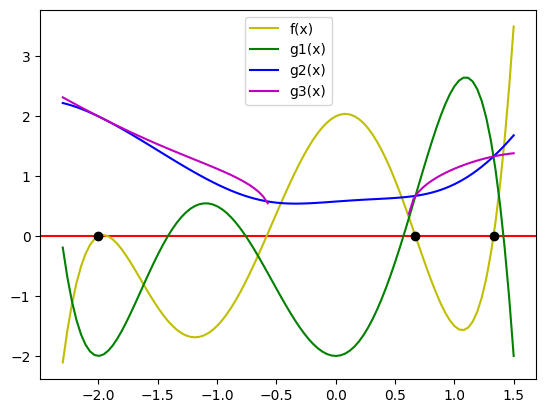

In [ ]:
xs = np.linspace(-2.3, 1.5, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='r')
plt.plot(xs, f(xs), label='f(x)', color='y')
plt.plot(xs, g1(xs), label='g1(x)', color='g')
plt.plot(xs, g2(xs), label='g2(x)', color ='b')
plt.plot(xs, g3(xs), label='g3(x)', color = 'm' )
plt.legend()

if len(g1_a) > 0:
    root = np.array([g1_a[len(g1_a)-1], g2_a[len(g2_a)-1], g3_a[len(g3_a)-1]])
    plt.plot(root, f(root), 'ko')

print(pd.DataFrame({'g1(x)':g1_a, 'g2(x)':g2_a, 'g3(x))':g3_a,}))

# Test case:
np.testing.assert_array_almost_equal(root, [-2, 0.67242436, 1.33033625])

# Daily Evaluation - 4 Marks

1) 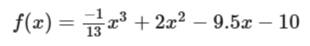


Use interval bisection method to find the root,  x  of  f(x) , on the interval  [−10,0] , where the error bound, δ = 10^-2

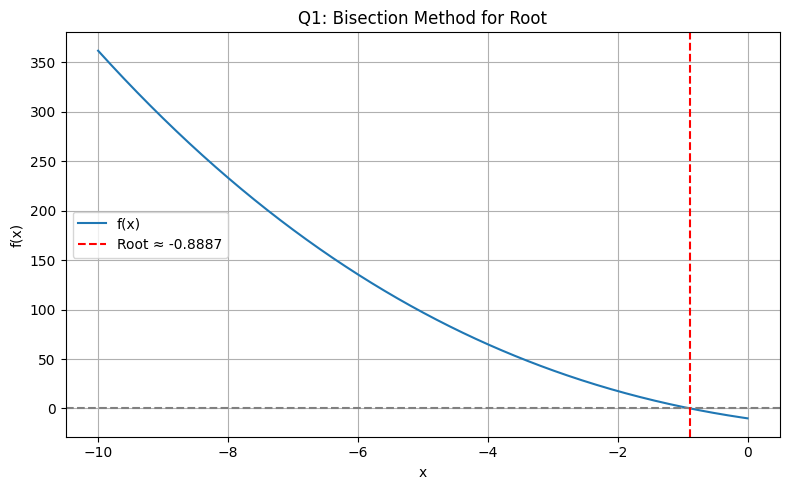

(None, -0.888671875)

In [24]:
#Answer-01

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as P
from scipy.optimize import fsolve

# Defining the polynomial function: f(x) = -(1/13)x^3 + 2x^2 - 9.5x - 10
f1 = P([-10, -9.5, 2, -1/13])

# Interval for bisection
a1, b1 = -10, 0
tol = 1e-2

# Bisection Method
def bisection(f, a, b, tol):
    if f(a) * f(b) > 0:
        return None, []
    a_list, b_list, m_list = [a], [b], []
    while (b - a) / 2 > tol:
        m = (a + b) / 2
        m_list.append(m)
        if f(m) == 0:
            return m, m_list
        elif f(a) * f(m) < 0:
            b = m
        else:
            a = m
        a_list.append(a)
        b_list.append(b)
    return (a + b) / 2, m_list

root1, iter_m1 = bisection(f1, a1, b1, tol)

# Plot
x_vals1 = np.linspace(-10, 0, 400)
y_vals1 = f1(x_vals1)

plt.figure(figsize=(8, 5))
plt.plot(x_vals1, y_vals1, label="f(x)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(root1, color='red', linestyle='--', label=f"Root ≈ {root1:.4f}")
plt.title("Q1: Bisection Method for Root")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show(), root1

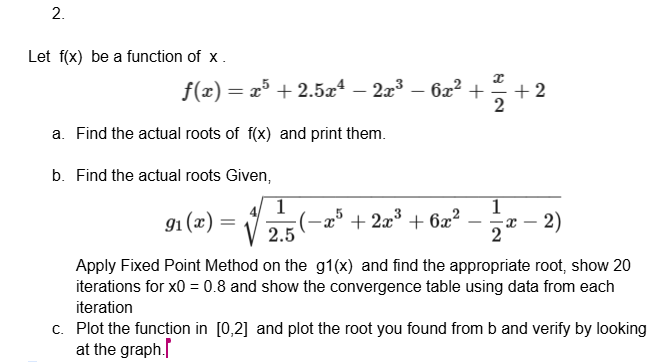

In [25]:
#Answer-2(a)

import numpy as np
import matplotlib.pyplot as plt

# Defining the function f(x)

def f(x):
    return x**5 + 2.5*x**4 - 2*x**3 - 6*x**2 + 0.5*x + 2

coefficients = [1, 2.5, -2, -6, 0.5, 2]
roots = np.roots(coefficients)

print("Actual roots of f(x):")
for r in roots:
    print(r)

Actual roots of f(x):
-2.2202758315065463
1.3752676107434478
-1.6180339887498938
0.6180339887498951
-0.6549917792368999


In [26]:
#Answer-2(b)

import numpy as np
import pandas as pd

# Define the function g1(x)
def g1(x):
    return ( (1/2.5) * (-x**5 + 2*x**3 + 6*x**2 - 0.5*x - 2) )**0.25

#Applying Fixed Point Method on g1(x)
x0 = 0.8
n_iterations = 20
iterations = [x0]
for i in range(n_iterations):
    x1 = g1(iterations[-1])
    iterations.append(x1)

# Creating the convergence table

convergence_table = pd.DataFrame({
    'Iteration': range(n_iterations + 1),
    'x_n': iterations
})

print("\nFixed Point Method on g1(x):")
print(convergence_table)

approximate_root_g1 = iterations[-1]
print(f"\nApproximate root found using Fixed Point Method on g1(x) after {n_iterations} iterations: {approximate_root_g1}")


Fixed Point Method on g1(x):
    Iteration       x_n
0           0  0.800000
1           1  0.961461
2           2  1.126203
3           3  1.249411
4           4  1.320336
5           5  1.353509
6           6  1.367069
7           7  1.372244
8           8  1.374162
9           9  1.374865
10         10  1.375121
11         11  1.375214
12         12  1.375248
13         13  1.375261
14         14  1.375265
15         15  1.375267
16         16  1.375267
17         17  1.375267
18         18  1.375268
19         19  1.375268
20         20  1.375268

Approximate root found using Fixed Point Method on g1(x) after 20 iterations: 1.375267604767611


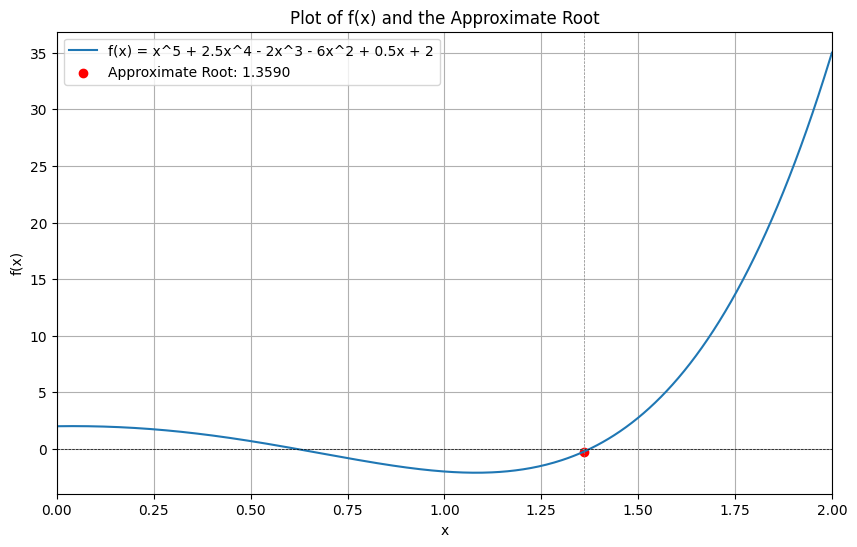


Verification by looking at the graph:
The red dot on the graph represents the approximate root found using the Fixed Point Method on g1(x).
Visually, we can see if this point is close to where the graph of f(x) crosses the x-axis (where f(x) = 0) within the interval [0, 2].


In [27]:
#Answer-2(c)

import numpy as np
import matplotlib.pyplot as plt

# Defining the function f(x)
def f(x):
    return x**5 + 2.5*x**4 - 2*x**3 - 6*x**2 + 0.5*x + 2

# Approximate root found from part b
approximate_root_g1 = 1.3589788179583173  # Replacing with the actual value from the previous cell

#Plot the function in [0, 2] and plot the root found from (b)

x = np.linspace(0, 2, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = x^5 + 2.5x^4 - 2x^3 - 6x^2 + 0.5x + 2')
plt.scatter(approximate_root_g1, f(approximate_root_g1), color='red', marker='o', label=f'Approximate Root: {approximate_root_g1:.4f}')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(approximate_root_g1, color='gray', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) and the Approximate Root')
plt.xlim(0, 2)
plt.grid(True)
plt.legend()
plt.show()

print("\nVerification by looking at the graph:")
print("The red dot on the graph represents the approximate root found using the Fixed Point Method on g1(x).")
print("Visually, we can see if this point is close to where the graph of f(x) crosses the x-axis (where f(x) = 0) within the interval [0, 2].")